# Table of Contents
- 1 [Executive Summary](#1)
    - 1.1 [Business Goals](#1.1)
    - 1.2 [Findings](#1.2)
- 2 [Introduction](#2)
    - 2.1 [Purpose of Analysis](#2.1)
    - 2.2 [Business & Text Mining Goals](#2.2)
- 3 [Text Mining Procedure](#3)
    - 3.1 [Data Preparation](#3.1)  
        - 3.1.1 [Osha](#3.1.1)
        - 3.1.2 [Msia](#3.1.2)
    - 3.2 [Identification of most frequent type of accidents](#3.2)
        - 3.2.1	[Preprocessing](#3.2.1)
        - 3.2.2	[Modeling](#3.2.2)
        - 3.2.3	[Result on Osha](#3.2.3)
    - 3.3	[Identifying High-risk Occupations](#3.3)
        - 3.3.1	[Data Processing](#3.3.1)
        - 3.3.2	[Results](#3.3.2)
    - 3.4	[Identify high-risk injured parts of human body](#3.4)
        - 3.4.1	[Data Processing](#3.4.1)
        - 3.4.2	[Results](#3.4.2)
- 4 [Conclusion](#4)
    - 4.1 [Recommendations](#4.1)
    - 4.2 [Limitations and Improvements](#4.2)

---

<a id="1"></a>
# 1. Executive summary
<a id="1.1"></a>
## 1.1 Business Goals

In recent years, construction accidents have been happening a lot in Singapore and other countries worldwide. It results in significant human suffering, delayed project schedules, damaged reputations of the companies and industries involved, and numerous other negative consequences. 

Therefore, we propose some indicators like inspection findings, audit score and safety climate surveys to help construction-related organizations to investigate accidents. Due to the unreliability of these indicators, we will be using text mining techniques to solve two problems in this report. 

The first one is developing a classifier model to find the most common causes for construction accidents. The other is extracting useful data in the dataset "Fatality and Catastrophe Investigation Summary" to pinpoint occupations and workplace activities that face higher safety risks than others.

<a id="1.2"></a>
## 1.2 Findings

Based on the result of our analysis, we find that “Struck by Moving Objects” is the leading cause of injury in the construction industry, and that operators are the easiest injured occupation. Fingers are the easiest injured human body part of victims.

It is recommended that some specific safety protection guidelines, such as the mandatory wearing of safety equipment like eye protectors, should be made by the authority to mitigate the identified risks and prevent the occurrence of similar accidents.

<a id="2"></a>
# 2. Introduction
<a id="2.1"></a>
## 2.1 Purpose of analysis

In recent years, the construction industry has remained the top contributor for workplace fatalities in Singapore. Likewise, poor construction safety performance is common to see in other countries, which causes significant human suffering, property damage and great time consumption. 

To improve construction safety performance, many have proposed the use of leading indicators such as inspection findings, audit score and safety climate surveys. But the reliability of these indicators are still not validated. Thus, a Fatality and Catastrophe Investigation Summary dataset is mined to identify higher safety risks occupations and work place activities.

<a id="2.2"></a>
## 2.2 Business & Text Mining goals

To realize our business target, which is to reduce construction accidents, we need to answer the questions below in detail:
- Which type of accidents (in terms of main causes) are more common in fatal or catastrophic accidents?
- What are risky occupations in such accidents?
- Which parts of the human body are more prone to be injured in such accidents?

These four questions can be rephrased into the following four text mining goals:

- Identify the most frequent type of accidents in fatal or catastrophic accidents.
- Identify high-risk occupations in fatal or catastrophic accidents.
- Identify high-risk injured parts of human body in fatal or catastrophic accidents.

In this way, it is possible to take some preventative measures to reduce construction accidents. We will answer these questions in detail in the following parts of our report.

<a id="3"></a>
# 3. Text Mining Procedure
<a id="3.1"></a>
## 3.1 DATA PREPARATION

There are two available datasets, MsiaAccidentCases (Msia) and Osha. Originally, Osha has 16323 records which summarize the accidents happened in U.S. while Msia only has 235 records and they all happened in Malaysia. 

There are some natural differences between these two datasets. For instance, the workers are usually called "Employee" in Osha and "Victim" in Msia. In the following parts, we will look at them in more detail.

<a id="3.1.1"></a>
### 3.1.1 Osha

Based on the initial observation of Osha, we found that a few corrupted accident records exist in the Osha dataset. These records were updated by re-crawling the official   Occupational Safety and Health Administration website. 

In addition, Part-of-Speech (POS) tagging was also applied to two columns of Osha. The table below shows a preview of the “Osha” dataset after tagging, which is unlabeled and consists of six parts:
![Figure 1 - Preview of Osha](img/Preview of Osha.png)

<a id="3.1.2"></a>
### 3.1.2 Msia
The Msia data table consists of a label and two text columns, as shown below. The "Summary Case" is the specific description of the accident while the "Title Case" contains more concise information.
![Figure 2 - Preview of Msia](img/Preview of Msia.png)

However, we found that some records have been misclassified. Examples are shown in the following table.

**Cause**|**Title**|**Summary**|**Likely Cause**
:-----:|:-----:|:-----:|:-----:
Fires and Explosion|Died being run over by a lorry|Accident involving an employee who has been run over by a lorry while riding his motorcycle|Struck by Moving Objects
Falls|Died struck by falling beam|Incident occurred during the workers were performing brick installation work and slab suddenly collapsed. Victim was struck by falling beam and was pronounced dead by the ambulance|Collapse of object
Other|Found death in confined space|Six victims were killed in a confined space (a treated water pumping tank). They were killed due to toxic gases.|Exposure to Chemical Substance
Other|Died being buried|Victim died due to suffocation when he accidentally fell into a ditch which the victim himself dug and the surrounding earth afterwards fell into the ditch burying the victim.|Suffocation

The false causes were amended to the likely causes, and we noticed that there is no clear difference between “Struck by Moving Objects” and “Collapse of Objects”, as well as “Struck by Moving Objects” and “Caught in/between Objects”. Since we are not experts in the construction area, these ambiguous labels are retained.

In addition, the two causes "Other" and "Others" were merged together. The 12 main causes of accidents were hence reduced to 11.
![Figure 3 - Combination of Main Causes](img/Combination of Main Causes.png)

Finally, we applied some commonly used preprocessing techniques to the datasets, like converting all characters to lowercase, tokenization, striping spare whitespace and POS tagging. Although the information we will extract varied from different questions, the processing procedure is largely identical. More detailed processing steps will be introduced while answering the four questions.

<a id="3.2"></a>
## 3.2	IDENTIFICATION OF MOST FREQUENT TYPE OF ACCIDENTS
<a id="3.2.1"></a>
### 3.2.1	Preprocessing
To answer the first question, the labelled Msia data will be used to train the Osha data, which has had its misclassified labels amended. However, another problem has arisen, which is that the dataset is imbalanced. To illustrate it, the distribution of causes in Msia is shown as follows:
![Figure 4 - Distribution of Causes](img/Figure 4 - Distribution of Causes.png)

From the above figure, among the 235 cases, more than 70 cases are due to “Falls”, and there are less than 10 cases due to the first four causes. It may negatively influence the final model performance because the cost of misclassification on the Osha dataset will be high.  

To remedy the data imbalance, we manually selected some cases from Osha and added them into the Msia training dataset. After this data supplementation process, the distribution becomes:
![Figure 5 - Distribution of Causes after Data Supplementation](img/Figure 5 - Distribution of Causes after Data Supplementation.png)

Here, the distribution looks much better, and we will use the new dataset to build our model. Note that the Msia dataset is divided into the train set (1-182) and test set (183-235). In our new dataset, the first 222 records will be the new training set and the rest 53 will be new test set.

In this part, we treat the Title and Summary columns as usual text data. After tokenization, we converted all tokens to lowercase, and only retained the tokens that consist of alphabetic characters. Finally we removed English stop words in the nltk corpus. 

We are interested in the term frequency, so first we will separate the training and test sets into text (either Title or Summary) and Cause and then use the TfidfVectorizer function to get the needed features.

In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.tag.stanford import StanfordPOSTagger

# load data file
msia = pd.read_excel('data/MsiaAccidentCases.xlsx')
osha = pd.read_excel('data/osha.xlsx', header=None, parse_cols='A:D')

Preview of raw data

In [14]:
msia.head(3)

,Cause,Title Case,Summary Case
0,Caught in/between Objects,Died being caught in between machines,The accident occurred as victim was assigned t...
1,Other,Died been buried,The accident occurred during the floor concret...
2,Struck By Moving Objects,Died crushed by entrance arch,Victim with four co-workers were installing wo...


In [15]:
osha.head(3)

,0,1,2,3
0,201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,burn industrial truck waste proc fac pa...
1,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,truck flatbed truck trailer fall abdomen
2,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,construction undrgrd power line highway ...


Example of the corrupted value in the 2nd column of osha

In [16]:
osha[osha[1]==" Electric Shock "].head(3)

,0,1,2,3
62,14521470,Electric Shock,THE OWNER OF A COMPANY AND ONE OF HIS EMPLOYE...,electrical electrocuted electric shock ...
192,315964536,Electric Shock,On April 3 2012 an employee was working for...,electrical electrocuted overhead power l...
282,200452894,Electric Shock,At 3:30 p.m. on October 17 2011 a hotel mai...,electrical electrocuted maintenance air...


Example of the corrupted value in the 3rd column of osha

In [17]:
osha[osha[2]=="InspectionOpen DateSICEstablishment Name"].head(3)

,0,1,2,3
15,201703584,Worker Is Injured When Struck By Board And Th...,InspectionOpen DateSICEstablishment Name,31592899410/31/20126531Pinnacle Construction &...
34,202614863,Employee Falls Through Ceiling Suffers Contu...,InspectionOpen DateSICEstablishment Name,31706460803/26/20137363Express Services Inc
61,14493290,Employee Asphyxiated By Nitrogen In Sandblast...,InspectionOpen DateSICEstablishment Name,10107273410/27/19872813Ref-Chem Corp


In [ ]:
# standardized dataframe header
msia.columns = [name.split()[0] for name in msia.columns]
osha.columns = ['Accident', 'Title', 'Summary', 'Keywords']

# merge Other and Others by changing Others to Other
msia.loc[msia.Cause == 'Others', 'Cause'] = 'Other'

# Strip whitespace (including newlines) from each string in the Series/Index from left and right sides
for col in ['Title', 'Summary', 'Keywords']:
    osha[col] = osha[col].astype('str').str.strip()

# impute missing data from source website by recrawling
url = 'https://www.osha.gov/pls/imis/accidentsearch.accident_detail'
# find index containing missing value
is_missing = (osha.Summary == 'InspectionOpen DateSICEstablishment Name') | (
    osha.Title.apply(lambda x: x.count(' ') <= 1))
length = sum(is_missing)
count = 0
print('Recrawling data for imputing...')
for index, row in osha.loc[is_missing].iterrows():
    print('%d/%d' % (count, length))
    page = requests.get(url, params={'id': row.Accident})  # get source page of missing record

    soup = BeautifulSoup(page.content, 'html.parser')
    strong = soup.select('#maincontain > div > p.text-center > strong')[0]
    td = soup.findAll("td", {"colspan": "8"})

    title = strong.text[strong.text.index('-') + 1:].strip()
    summary = td[1].text.strip()
    keywords = td[2].text[9:].strip().split(', ')

    osha.loc[index, 'Title'] = title
    osha.loc[index, 'Summary'] = summary
    osha.loc[index, 'Keywords'] = '  '.join(keywords)  # double spaces
    count += 1

# Using Stanford POS Tagger rather than nltk default pos tagger to get more accurate pos tag
pos_model_path = 'C:/tools/stanford-postagger-full-2017-06-09/models/english-bidirectional-distsim.tagger'  # change folder path to your own
pos_jar_path = 'C:/tools/stanford-postagger-full-2017-06-09/stanford-postagger.jar'  # change folder path to your own
# Initialize the tagger
st_pos = StanfordPOSTagger(pos_model_path, pos_jar_path)

print('Start Standford POS Tagging for Title...')
osha['Title_POS'] = osha.Title.apply(lambda x: st_pos.tag(word_tokenize(x.lower())))
osha.to_csv(output_dir + 'osha_cleaned_pos.csv', index=False)
print('Start Standford POS Tagging for Summary...')
osha['Summary_POS'] = osha.Summary.apply(lambda x: st_pos.tag(word_tokenize(x.lower())))
osha.to_csv(output_dir + 'osha_cleaned_pos.csv', index=False)

# save to file
msia.to_csv(output_dir + 'MsiaAccidentCases_cleaned.csv', index=False)

<a id="3.2.2"></a>
### 3.2.2 Modeling

As mentioned above, we have two useful text columns, Title and Summary. Title is one phrase summarizing the cases, more specific than Cause but much more concise than Summary. Summary describes the incident specifically, which usually consists of more than one sentence, and contains extraneous information. 

Different models were built using Title and Summary. The table below shows the accuracy of each model. In line with our intuition, models using Summary as features perform much worse than those using Title.

**Models**|**Title**|**Summary**
:-----:|:-----:|:-----:
Decision Tree|0.62|0.45
KNN|0.66|0.51
Multinomial NB|0.60|0.33
SVM|0.77|0.47
Logistic regression|0.62|0.49
Ensemble (voting)|0.66|0.41

The SVM model, using Title as feature, performs best with 77% accuracy. In the next part, we will use this model to predict the most common causes in fatal accidents.

In [18]:
msia = pd.read_csv( 'data/MsiaAccidentCases_cleaned.csv')
osha = pd.read_csv( 'data/osha_cleaned_pos.csv')

Training models based on Msia Accident Cases Title...
	Decision Tree:			0.622642
	K Nearest Neighbors:		0.660377
	Naive Bayesian:			0.603774
	SVM:				0.773585
	Logistic Regression:		0.622642
	Ensemble (Majority Vote):	0.660377
Prediction score based on Summary:
	Decision Tree:			0.452830
	K Nearest Neighbors:		0.509434
	Naive Bayesian:			0.339623
	SVM:				0.471698
	Logistic Regression:		0.490566
	Ensemble (Majority Vote):	0.415094
Using SVM Model based on Titles of Msia dataset to predice Causes for OSHA dataset...
Distribution of causes for OSHA Accident Cases dataset (predicted):


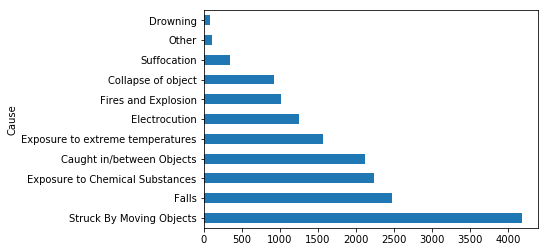

Cause
Struck By Moving Objects            4187
Falls                               2469
Exposure to Chemical Substances     2238
Caught in/between Objects           2124
Exposure to extreme temperatures    1568
Electrocution                       1254
Fires and Explosion                 1013
Collapse of object                   927
Suffocation                          349
Other                                114
Drowning                              80
dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords, wordnet
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

wnl = nltk.WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    '''
    Map the treebank tags to WordNet part of speech names.
    :param treebank_tag: nltk default pos tag
    :return: wordnet pos tag
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # including startswith('N') and unknown pos


def lemmatize(text):
    '''
    Lemmatizing.
    :param text: string
    :return: lemmatized string
    '''
    text = text.lower()

    # TODO check if need sentence tokenization
    pos_tokens = [(token, pos) for token, pos in pos_tag(word_tokenize(text)) if
                  token.isalpha() and token not in stopwords.words('english')]
    lem_text = ' '.join([wnl.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tokens])

    return lem_text

print('Training models based on Msia Accident Cases Title...')
title_final = msia['Title'].apply(lemmatize)

# separate dataset
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(title_final)
y = msia.Cause

X_train = X[:222]
X_test = X[222:]
y_train = y[:222]
y_test = y[222:]

seed = 35
dt = DecisionTreeClassifier(random_state=seed).fit(X_train, y_train)
print('\tDecision Tree:\t\t\t%f' % dt.score(X_test, y_test))

knn = KNeighborsClassifier(n_neighbors=11, weights='distance', \
                           metric='cosine', algorithm='brute').fit(X_train, y_train)
print('\tK Nearest Neighbors:\t\t%f' % knn.score(X_test, y_test))

mnb = MultinomialNB().fit(X_train, y_train)
print('\tNaive Bayesian:\t\t\t%f' % mnb.score(X_test, y_test))

svm = SVC(C=1000000.0, gamma='auto', kernel='rbf').fit(X_train, y_train)
print('\tSVM:\t\t\t\t%f' % svm.score(X_test, y_test))

lr = LogisticRegression().fit(X_train, y_train)
print('\tLogistic Regression:\t\t%f' % lr.score(X_test, y_test))

vc = VotingClassifier(estimators=[ \
    ('dt', dt), ('knn', knn), ('mnb', mnb), ('svm', svm), ('lr', lr) \
    ], voting='hard').fit(X_train, y_train)

print('\tEnsemble (Majority Vote):\t%f' % vc.score(X_test, y_test))

print('Prediction score based on Summary:')
lem_summary = msia['Summary'].apply(lemmatize)
vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(lem_summary)
y2 = msia.Cause

X2_train = X2[:222]
X2_test = X2[222:]
y2_train = y2[:222]
y2_test = y2[222:]

dt2 = DecisionTreeClassifier(random_state=seed).fit(X2_train, y2_train)
print('\tDecision Tree:\t\t\t%f' % dt2.score(X2_test, y2_test))

knn2 = KNeighborsClassifier(n_neighbors=11, weights='distance', \
                            metric='cosine', algorithm='brute').fit(X2_train, y2_train)
print('\tK Nearest Neighbors:\t\t%f' % knn2.score(X2_test, y2_test))

mnb2 = MultinomialNB().fit(X2_train, y2_train)
print('\tNaive Bayesian:\t\t\t%f' % mnb2.score(X2_test, y2_test))

svm2 = SVC(C=1000000.0, gamma='auto', kernel='rbf').fit(X2_train, y2_train)
print('\tSVM:\t\t\t\t%f' % svm2.score(X2_test, y2_test))

lr2 = LogisticRegression().fit(X2_train, y2_train)
print('\tLogistic Regression:\t\t%f' % lr2.score(X2_test, y2_test))

vc2 = VotingClassifier(estimators=[ \
    ('dt', dt2), ('knn', knn2), ('mnb', mnb2), ('svm', svm2), ('lr', lr2) \
    ], voting='hard').fit(X2_train, y2_train)

print('\tEnsemble (Majority Vote):\t%f' % vc2.score(X2_test, y2_test))
print

print('Using SVM Model based on Titles of Msia dataset to predice Causes for OSHA dataset...')
print

# predict
lem_title_osha = osha['Title'].apply(lemmatize)
X_osha = vectorizer.transform(lem_title_osha)
osha_pred = svm.predict(X_osha)
osha['Cause'] = pd.Series(osha_pred)

print('Distribution of causes for OSHA Accident Cases dataset (predicted):')
osha_cause_count = osha.groupby('Cause').size().sort_values(ascending=False)
osha_cause_count.plot(kind='barh')
plt.show()
print(osha_cause_count)

# osha.to_csv('data/osha_cleaned_pos_predict.csv', index=False)

<a id="3.2.3"></a>
### 3.2.3 Result on Osha
Using the best classification model on Osha data, the most common cause in fatal accidents is “Struck by Moving Objects”, which is ranked second in the Msia data. Among all the 16323 accidents, more than 4000 are due to the reason “Struck by Moving Objects”, which is a very high proportion.

As mentioned above, the causes of a few of accidents vary significantly. It is possible to classify them into more than one categories or clarify the differences between all the causes. It may be worth further study onto this aspect.

<a id="3.3"></a>
## 3.3	IDENTIFYING HIGH-RISK OCCUPATIONS
<a id="3.3.1"></a>
### 3.3.1	Data Processing
Since our dataset doesn't have any existing labeled occupation and manually labeling more than 16,000 records is too time-consuming, we selected a rule-based system to process the data. 

In this case, a hand-coded rule system from linguists with domain input, which is an iterative method based on document inspection, is applied here. Generally, the process for this question is shown as below:
![Figure 7 - Overview of Processa Processing](img/Figure 7 - Overview of Processa Processing.png)

The emphasis here is how to build the rule-based system for this information extraction task. The RegexpParser tool from the nltk library is used to implement this system.

After selecting the tool, we design our rules based on our observation. The victims found within the provided dataset hold varying occupations. After looking through the data, it is noticeable that occupations are mentioned within the descriptions. Some examples of occupations found in Title column are:

'Foreman Is Fatally Crushed When Forklift Tips Over’
'Carpenter Injured In Abdomen When Saw Kicks Back’
'Logger Is Injured When Butt Of Tree Kicks Out Strikes Him’
'Bulldozer Operator Is Crushed While Working On Engine’
'Carpenter Is Injured In Fall From Ceiling Joist’
'Pipeline Worker Is Struck And Injured By Falling Cement’
'Driver Hurt When Truck Unloading Sand Overturns'

Some examples of occupations found in the Summary column are:

'#1 a foreman’
'#1 a crane operator’
'#1 a baggage tug operator’
'#1 a carpenter/framer’
‘#1 a plumber's assistant’
'#1 a 53-year-old male tractor operator’
'#1 a 47-year-old female Tractor Driver ’

Next, we will illustrate how we acquire occupations in the following specific steps:

**Step One: Tagging**

In order to extract the occupations of the victims, we need to identify the patterns listed above from the case descriptions, and then implement POS tagging. We apply the Stanford pos_tag tagger to the 1st example in Title above to can get a pattern:

```
[('foreman', 'NN'), ('is', 'VBZ'), ('fatally', 'RB'), ('crushed', 'VBN'), ('when', 'WRB'), ('forklift', 'NN'), ('tips', 'NNS'), ('over', 'IN')]
```

And for the 1st example in Summary above we can get a pattern as follows:

```
('#', '#'), ('1', 'CD'), ('a', 'DT'), ('foreman', 'NN')
```

**Step Two: Grammar Derivation**
Since the syntax structure of the majority of the listed patterns are similar, we created a regular expression tagger to tag this pattern so that our chunker below can identify this as the beginning of our interested pattern. The pattern grammar for Title is shown below:

```
NP: {<NN.*>+}
CLAUSE: {^<CD>?<NP><POS>?<NN.*>*<VB.*>}
```

The pattern grammar for Summary is shown below:

```
NP: {<NN.*>+}
CLAUSE: {<\#><CD><DT>?<JJ>*<NP>}
```

To illustrate the above steps further, here are some examples. The first is for the sentence "Foreman Is Fatally Crushed When Forklift Tips Over" in Title column.

Step|Action|Output of Action
:-----:|:-----:|:-----:
1|Tagging|[('foreman', 'NN'), ('is', 'VBZ'), ('fatally', 'RB'), ('crushed', 'VBN'), ('when', 'WRB'), ('forklift', 'NN'), ('tips', 'NNS'), ('over', 'IN')]
2|Chunking|(S, (CLAUSE (NP foreman/NN) is/VBZ),fatally/RB, crushed/VBN,when/WRB,(NP forklift/NN tips/NNS),over/IN)
3|Result|foreman                                                                                                                                |

For sentence "Employee #1 a baggage tug operator" in Summary column,

Step|Action|Output of Action
:-----:|:-----:|:-----:
1|Tagging|[('on', 'IN'), ('april', 'NNP'), ('23', 'CD'), ('2013', 'CD'), ('employee', 'NN'), ('#', '#'), ('1', 'CD'), ('a', 'DT'), ('baggage', 'NN'), ('tug', 'NN'), ('operator', 'NN'), ('was', 'VBD'), ('working', 'VBG'), ('on', 'IN'), ('the', 'DT'), ('ground', 'NN')]
2|Chunking|(S,on/IN,(NP april/NNP),23/CD,2013/CD,(NP employee/NN),(CLAUSE #/# 1/CD a/DT (NP baggage/NN tug/NN operator/NN)),was/VBD,working/VBG,on/IN,the/DT,(NP ground/NN))
3|Result|foreman

**Step Three: Stop Words and Error Words**
A dictionary of stop words and error words are created to eliminate incorrect output based on the rules. We set some meaningless words and incorrectly extracted words as stops and errors respectively, which are shown as below:
```python
stops = ['employee', 'worker', 'laborer', 'owner', 'coworker', 'contractor']  
errors = ['age', 'hand', 'male']
```

**Step Four: Group Highly-Correlated Occupations**
For example, ‘truck driver’ and ‘driver’ are merged into ‘driver’. In fact, drivers can be divided into several categories, like truck driver, bus driver, and taxi driver. However, it is difficult to extract them out accurately, and separating them affects our result slightly. Therefore, we believe that it is reasonable to merge them into one category. 

In order to implement above idea, we use the following logic:

```python
if lem[0] not in (stops+errors):
	if len(lem) > 1 and lem[-1] not in (stops+errors):
      	lem = [lem[-1]]
      return ' '.join(lem)
```

To elaborate, we first select those chunking result whose first word doesn’t in stops word list and errors word list, then we judge if the chunking result has more than one word and if yes, we select the last word in it if the last word doesn’t in stops word list and errors word list.

Parsing Title ...
Parsing Summary ...
Top 10 risky occupations for OSHA dataset:


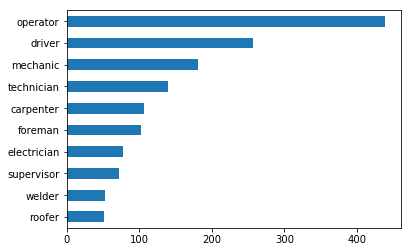

operator               439
driver                 256
mechanic               181
technician             139
carpenter              107
foreman                103
electrician             77
supervisor              72
welder                  53
roofer                  52
painter                 49
farm worker             47
manager                 45
firefighter             45
maintenance worker      41
construction worker     40
installer               33
engineer                30
helper                  29
guard                   29
dtype: int64
OSHA occupations word cloud:


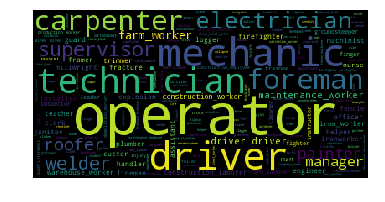

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from ast import literal_eval

wnl = nltk.WordNetLemmatizer()  # initialize Lemmatizer

# chunk sequences of proper nouns phrase
grammar_title = '''
NP: {<NN.*>+}
CLAUSE: {^<CD>?<NP><POS>?<NN.*>*<VB.*>}
'''
cp_title = nltk.RegexpParser(grammar_title)

grammar_summary = '''
NP: {<NN.*>+}
CLAUSE: {<\#><CD><DT>?<JJ>*<NP>}
'''
cp_summary = nltk.RegexpParser(grammar_summary)

stops = ['employee', 'worker', 'laborer', 'owner', 'coworker', 'contractor']  # meaningless occupation term list
errors = ['age', 'hand', 'male']


def trasverse_tree(chunked):
    for n1 in chunked:
        if isinstance(n1, nltk.tree.Tree) and n1.label() == 'CLAUSE':
            for n2 in n1:
                if isinstance(n2, nltk.tree.Tree) and n2.label() == 'NP':
                    lem = [wnl.lemmatize(w) for w, t in n2]
                    # reject 'worker' but accept 'farm worker'
                    if lem[0] not in (stops + errors):
                        if len(lem) > 1 and lem[-1] not in (stops + errors):
                            lem = [lem[-1]]
                        return ' '.join(lem)


def parse_title_occupation(text):
    '''
    Extract occupation information from input
    :param text: string storing pos tag
    :return: occupation term
    '''
    pos = literal_eval(text)  # string to list
    chunked = cp_title.parse(pos)  # chunking

    return trasverse_tree(chunked)


def parse_summary_occupation(text):
    pos = literal_eval(text)  # string to list
    try:
        first_sent = pos[:pos.index(('.', '.'))]  # parse first sentence with pos tag
    except ValueError:
        return None
    chunked = cp_summary.parse(first_sent)  # chunking

    return trasverse_tree(chunked)


print('Parsing Title ...')
osha_title_occupation = osha.Title_POS.apply(parse_title_occupation)

print('Parsing Summary ...')
osha_summary_occupation = osha[osha_title_occupation.isnull()]['Summary_POS'].apply(parse_summary_occupation)

osha_title_occupation = osha_title_occupation.dropna()  # remove all None value
osha_summary_occupation = osha_summary_occupation.dropna()  # remove all None value
osha_occupation = pd.concat([osha_title_occupation, osha_summary_occupation])  # Concatenating together

# visualization
print('Top 10 risky occupations for OSHA dataset:')
osha_occupation_count = osha_occupation.groupby(osha_occupation).size().sort_values(ascending=False)
osha_occupation_count.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()
print(osha_occupation_count.head(20))
print('OSHA occupations word cloud:')
osha_word_string = ' '.join([w.replace(' ', '_') for w in osha_occupation])
osha_word_cloud = WordCloud().generate(osha_word_string)
plt.imshow(osha_word_cloud)
plt.axis('off')
plt.show()

<a id="3.3.2"></a>
### 3.3.2	Results
Finally, we extract 4109 effective occupations from Osha. Based on the word cloud and histogram of these records, the operator has the highest risk, followed by driver, mechanic, technician, carpenter and foreman.

<a id="3.4"></a>
## 3.4	IDENTIFY HIGH-RISK INJURED PARTS OF HUMAN BODY
<a id="3.4.1"></a>
### 3.4.1	Data Processing
To extract injured human body parts in accidents, we observed the preprocessed dataset and we found that much of the Keywords column contained human body parts. Since the existence of the dictionary of human body terms and human body parts information can be found in the keywords column easily, data processing becomes much easier.

What was done is to split each Keywords column and match the created term list with the prepared human body terms list crawling from internet. The process to identify high-risk injured parts of human body is shown as below:

![Figure 10 - Overview of Data Processing](img/Figure 10 - Overview of Data Processing.png)



## Which parts of human body are more prone to be injured in such accidents?

To extract common injured human body parts in accidents, we first observe the preprocessed dataset and we found that at most cases, the Keywords column contain human body parts information. Hence, we split each Keywords column and match the created term list with the prepared human body terms list crawling from internet and conduct statistic on the result.

Top 10 common injured of human body parts for OSHA dataset:


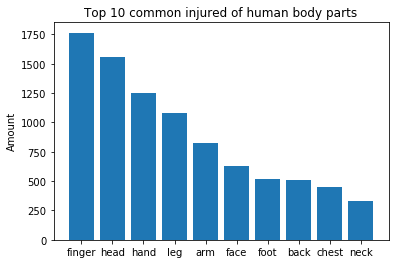

finger:	1764
head:	1556
hand:	1249
leg:	1081
arm:	821
face:	629
foot:	515
back:	512
chest:	447
neck:	333
OSHA injured of human body parts word cloud:


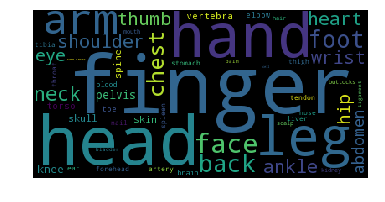

In [10]:
import re
import pickle
from collections import Counter
import numpy as np

# load body terms list
try:
    human_body_terms = pickle.load(open("data/human_body_terms.pk", "rb"))
except FileNotFoundError:
    page = requests.get('http://www.enchantedlearning.com/wordlist/body.shtml')
    soup = BeautifulSoup(page.content, 'html.parser')
    table = soup.find('table', {'border': '1'})
    tds = table.findAll("td")
    [center.extract() for td in tds for center in td.findAll('center')]
    human_body_terms = [term for td in tds for term in re.split('\n+', td.text.strip())]
    pickle.dump(human_body_terms, open("data/human_body_terms.pk", "wb"))


def get_body_parts(text):
    '''
    Extract human body term from input
    :param text: str
    :return: list containing body terms
    '''
    keywords = text.split()
    body_parts = [k for k in keywords if k in human_body_terms]
    if body_parts:
        return body_parts


if __name__ == "__main__":
    osha_body_parts = osha.Keywords.apply(get_body_parts)

    osha_body_parts = osha_body_parts.dropna()  # remove all None value

    # visualization
    print('Top 10 common injured of human body parts for OSHA dataset:')
    osha_body_parts_statistic = {}
    for parts in osha_body_parts:
        for part in parts:
            if part not in osha_body_parts_statistic:
                osha_body_parts_statistic.update({part: 1})
            else:
                osha_body_parts_statistic[part] += 1
    top_10 = Counter(osha_body_parts_statistic).most_common(10)  # find top 10 common injured of human body parts
    objects = tuple([o for o, c in top_10])
    y_pos = np.arange(len(objects))
    count = [c for o, c in top_10]
    plt.bar(y_pos, count)
    plt.xticks(y_pos, objects)
    plt.ylabel('Amount')
    plt.title('Top 10 common injured of human body parts')
    plt.show()
    for o, c in top_10: print('%s:\t%d' % (o, c))

    print('OSHA injured of human body parts word cloud:')
    osha_word_string = ' '.join([' '.join(w) for w in osha_body_parts])
    
    osha_word_cloud = WordCloud().generate_from_frequencies(osha_body_parts_statistic)
    plt.imshow(osha_word_cloud)
    plt.axis('off')
    plt.show()
    print

<a id="3.4.2"></a>
### 3.4.2	Results
We extracted 9017 human body terms from the Osha dataset in total, which occupies 55% of the overall records in Osha. In addition, the aggregate of top ten is 8907, which is a very high and satisfying proportion. This result is convincing and reliable to draw our final conclusion. 

From the histogram and word cloud, it is clear that the finger is the most common injured body part, followed by head, hand, leg, arm, face, foot, back, chest and neck. By the way, this answer matches with the answer of the high-risk occupations – operator, who will often use their fingers at work.

<a id="4"></a>
# 4. Conclusion
<a id="4.1"></a>
## 4.1	RECOMMENDATIONS

Once we have confirmed the most frequent type of accidents, the occupations with highest risk, the most often injured parts of human body, and the common engaged activities of victim, it is much easier to put forward an effective and pointed implementation plan.
The first step is that safety and health training to improve the safety awareness has to be a priority. Employees on construction sites need to be aware of dangers depending on their work environment, and workers should understand the fatal consequences they will suffer once they discard safety rules.

As the old saying goes, prevention is better than cure. The second step of the implementation plan is hence hazard prevention and control. For example, our second finding, that drivers and operators are the occupations with highest risk, shows motor vehicle crashes are a major safety hazard on construction sites. It is thus important to be cautious while operating motor vehicles or equipment on the site. 

A motor vehicle should have a service brake system, emergency brake system, and a parking brake system. All vehicles must be equipped with an audible warning system if the operator chooses to use it. Vehicles must have windows and doors, power windshield wipers, and a clear view of the surroundings from the rear window. All employees should be properly trained before using motor vehicles and equipment.

Another point is that machines and equipment which will cause potential risks need to be regulated. For instance, cables running across roadways were often seen until cable ramp equipment was invented to protect hoses and other equipment, which had to be laid out. 

Next, the authority should have regulations and guidelines for fall protection. More specifically, strikes by moving objects and falls are the leading causes of injury in the construction industry. 

Fall protection is needed in areas including but not limited to ramps, runways, and other walkways; excavations; hoist areas; holes; form-work; leading edge work; unprotected sides and edges; overhand bricklaying and related work; roofing; precast erection; wall openings; floor openings such as holes; residential construction; and other walking/working surfaces. Guardrails on all moving parts should be applied extensively.

<a id="4.2"></a>
## 4.2	LIMITATIONS AND IMPROVEMENTS
However, some of our text mining results may not be as reliable as we would like therefore the situation we describe at the beginning of this part may be biased and incorrect. Further study is needed to support and improve our final conclusion. 

More specifically, we didn’t mine the information about the environment of construction labours. Also, we extracted more than 9000 entries for the last question to identify victims’ most common activities, with most common activity (operating forklift) numbering 107. This signifies that most activities we have extracted are unique, which can be clustered into several categories for further exploration.

We checked the record keeping requirements as well, and found that employers with more than ten employees must record serious work-related injuries and illnesses. Hence, we assumed that all serious work-related injuries and illness are fatal and catastrophic, and used the entire dataset of Osha for our analysis. However, it is possible that serious work-related injuries and illnesses can be further categorized into different seriousness levels, which can be another avenue for further research.

For the Classifier model, the misclassified records have a big impact on the result because of the small dataset. Particularly, the Msia dataset is too small to build a stable and significant model even after adding some records to it. Finally, our amendments to the mislabelled data are most likely not all correct as we are not construction experts. A more well-labelled dataset will certainly let us achieve a better result. 